In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Error processing /content/drive/My Drive/Colab Notebooks/IntGenbyFuel2014.xlsx: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab Notebooks/IntGenbyFuel2014.xlsx'
Error processing /content/drive/My Drive/Colab Notebooks/IntGenbyFuel2015.xlsx: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab Notebooks/IntGenbyFuel2015.xlsx'
Error processing /content/drive/My Drive/Colab Notebooks/IntGenbyFuel2016.xlsx: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab Notebooks/IntGenbyFuel2016.xlsx'


<Figure size 1200x600 with 0 Axes>

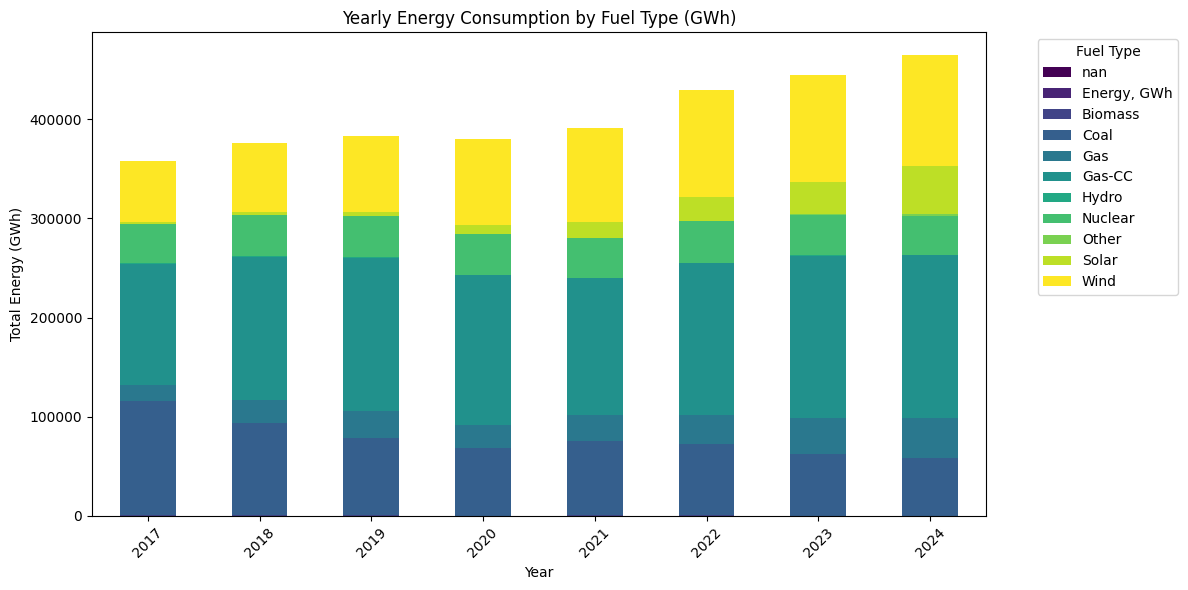

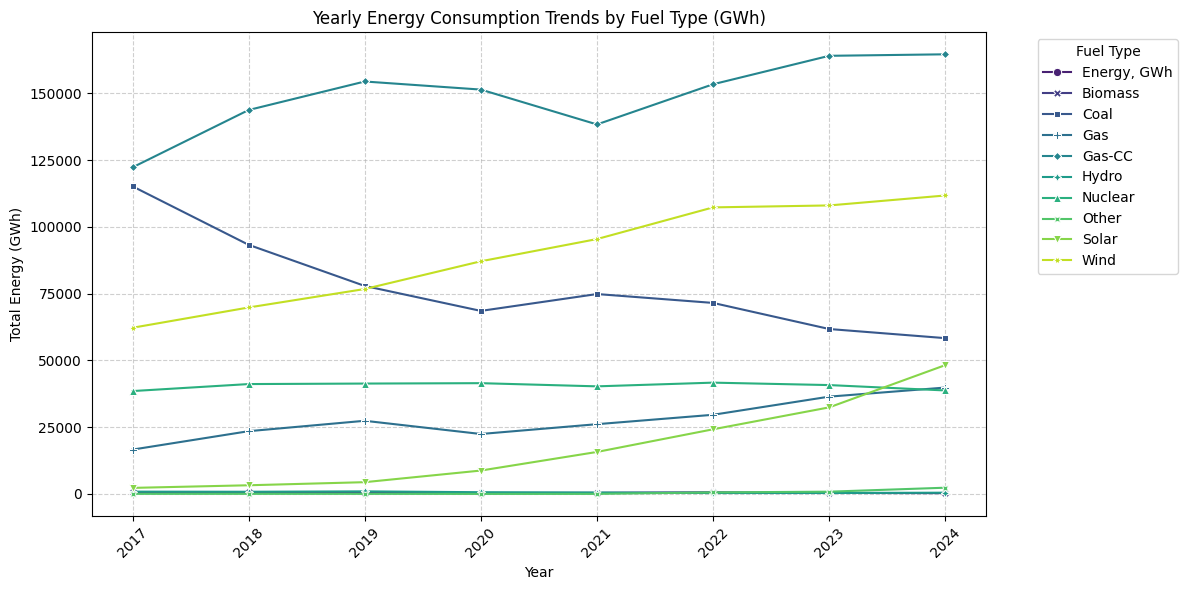

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# List of Excel files and corresponding years
file_paths = {
    "2014": "/content/drive/My Drive/Colab Notebooks/IntGenbyFuel2014.xlsx",
    "2015": "/content/drive/My Drive/Colab Notebooks/IntGenbyFuel2015.xlsx",
    "2016": "/content/drive/My Drive/Colab Notebooks/IntGenbyFuel2016.xlsx",
    "2017": "/content/drive/My Drive/Colab Notebooks/IntGenbyFuel2017.xlsx",
    "2018": "/content/drive/My Drive/Colab Notebooks/IntGenbyFuel2018.xlsx",
    "2019": "/content/drive/My Drive/Colab Notebooks/IntGenbyFuel2019.xlsx",
    "2020": "/content/drive/My Drive/Colab Notebooks/IntGenbyFuel2020.xlsx",
    "2021": "/content/drive/My Drive/Colab Notebooks/IntGenbyFuel2021.xlsx",
    "2022": "/content/drive/My Drive/Colab Notebooks/IntGenbyFuel2022.xlsx",
    "2023": "/content/drive/My Drive/Colab Notebooks/IntGenbyFuel2023.xlsx",
    "2024": "/content/drive/My Drive/Colab Notebooks/IntGenbyFuel2024.xlsx",
}

# Initialize an empty DataFrame
df_yearly = pd.DataFrame()

# Loop through each file, extract total yearly energy consumption
for year, file in file_paths.items():
    try:
        # Read the "Summary" sheet, assuming the structure is similar for all years
        df = pd.read_excel(file, sheet_name="Summary", skiprows=5)

        # Drop empty columns
        df = df.dropna(axis=1, how="all")

        # Rename columns for consistency
        df.columns = ["Fuel Type", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", "Total"]

        # Remove explanatory rows
        unwanted_entries = ["* Chart excludes Wholesale Storage Load because this resource category can have negative values.",
                            "* Information for this month has been updated based on final settlements.", "Total"]
        df = df[~df["Fuel Type"].astype(str).isin(unwanted_entries)]

        # Convert Total column to numeric
        df["Total"] = pd.to_numeric(df["Total"], errors="coerce")

        # Store in the master DataFrame
        df_yearly[year] = df.set_index("Fuel Type")["Total"]

    except Exception as e:
        print(f"Error processing {file}: {e}")

# Transpose the DataFrame to have years as the index
df_yearly = df_yearly.T
df_yearly.index = df_yearly.index.astype(int)  # Ensure index is integer type

# Drop any empty rows
df_yearly = df_yearly.dropna(axis=0, how="all")

# Plot Stacked Bar Chart
plt.figure(figsize=(12, 6))
df_yearly.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")

# Customize the plot
plt.title("Yearly Energy Consumption by Fuel Type (GWh)")
plt.xlabel("Year")
plt.ylabel("Total Energy (GWh)")
plt.legend(title="Fuel Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Line Graph
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_yearly, markers=True, dashes=False, palette="viridis")

# Customize the plot
plt.title("Yearly Energy Consumption Trends by Fuel Type (GWh)")
plt.xlabel("Year")
plt.ylabel("Total Energy (GWh)")
plt.legend(title="Fuel Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of uploaded file paths
file_paths = {
    "2014": "/content/drive/My Drive/Colab Notebooks/IntGenbyFuel2014.xlsx",
    "2015": "/content/drive/My Drive/Colab Notebooks/IntGenbyFuel2015.xlsx",
    "2016": "/content/drive/My Drive/Colab Notebooks/IntGenbyFuel2016.xlsx",
    "2017": "/content/drive/My Drive/Colab Notebooks/IntGenbyFuel2017.xlsx",
    "2018": "/content/drive/My Drive/Colab Notebooks/IntGenbyFuel2018.xlsx",
    "2019": "/content/drive/My Drive/Colab Notebooks/IntGenbyFuel2019.xlsx",
    "2020": "/content/drive/My Drive/Colab Notebooks/IntGenbyFuel2020.xlsx",
    "2021": "/content/drive/My Drive/Colab Notebooks/IntGenbyFuel2021.xlsx",
    "2022": "/content/drive/My Drive/Colab Notebooks/IntGenbyFuel2022.xlsx",
    "2023": "/content/drive/My Drive/Colab Notebooks/IntGenbyFuel2023.xlsx",
    "2024": "/content/drive/My Drive/Colab Notebooks/IntGenbyFuel2024.xlsx",
}

# Initialize an empty dataframe to store yearly data
df_yearly = pd.DataFrame()

for year, file in file_paths.items():
    try:
        # Read the "Summary" sheet
        df = pd.read_excel(file, sheet_name="Summary", skiprows=5)

        # Drop empty columns and rename columns properly
        df = df.dropna(axis=1, how="all")
        df.columns = ["Fuel Type"] + list(df.columns[1:])

        # Find the correct "Total" column (it might have variations)
        total_column = [col for col in df.columns if "Total" in col or "GWh" in col]
        if not total_column:
            print(f"Skipping {file}: No suitable 'Total' column found.")
            continue  # Skip this file

        total_column = total_column[0]  # Select the first matched column

        # Remove unwanted rows
        unwanted_entries = [
            "Energy, GWh", "nan",
            "* Chart excludes Wholesale Storage Load because this resource category can have negative values.",
            "* Information for this month has been updated based on final settlements."
        ]
        df = df[~df["Fuel Type"].astype(str).isin(unwanted_entries)]

        # Extract only the "Total" column for energy consumption
        df = df[["Fuel Type", total_column]]
        df.rename(columns={total_column: "Total"}, inplace=True)  # Standardize column name
        df["Year"] = year

        # Append to main dataframe
        df_yearly = pd.concat([df_yearly, df], ignore_index=True)

    except Exception as e:
        print(f"Error processing {file}: {e}")

# Convert "Total" column to numeric
df_yearly["Total"] = pd.to_numeric(df_yearly["Total"], errors="coerce")

# Convert data into wide format for plotting
df_pivot = df_yearly.pivot(index="Year", columns="Fuel Type", values="Total")

# Remove any potential NaN values
df_pivot.fillna(0, inplace=True)

# Stacked Bar Graph
plt.figure(figsize=(12, 6))
df_pivot.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")

# Customize the plot
plt.title("Yearly Energy Consumption by Fuel Type (GWh)")
plt.xlabel("Year")
plt.ylabel("Total Energy (GWh)")
plt.legend(title="Fuel Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Line Graph
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_pivot, markers=True, dashes=False)

# Customize the plot
plt.title("Yearly Energy Consumption Trends by Fuel Type (GWh)")
plt.xlabel("Year")
plt.ylabel("Total Energy (GWh)")
plt.legend(title="Fuel Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

Error processing /content/drive/My Drive/Colab Notebooks/IntGenbyFuel2014.xlsx: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab Notebooks/IntGenbyFuel2014.xlsx'
Error processing /content/drive/My Drive/Colab Notebooks/IntGenbyFuel2015.xlsx: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab Notebooks/IntGenbyFuel2015.xlsx'
Error processing /content/drive/My Drive/Colab Notebooks/IntGenbyFuel2016.xlsx: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab Notebooks/IntGenbyFuel2016.xlsx'
Skipping /content/drive/My Drive/Colab Notebooks/IntGenbyFuel2017.xlsx: No suitable 'Total' column found.
Skipping /content/drive/My Drive/Colab Notebooks/IntGenbyFuel2018.xlsx: No suitable 'Total' column found.
Skipping /content/drive/My Drive/Colab Notebooks/IntGenbyFuel2019.xlsx: No suitable 'Total' column found.
Skipping /content/drive/My Drive/Colab Notebooks/IntGenbyFuel2020.xlsx: No suitable 'Total' column found.
Skipping /content/drive/My Drive/

KeyError: 'Total'